In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd
import sqlite3
import time
import calendar
from sklearn import tree

In [218]:
#Load the dataset
#Assign database file to a variable
db_file = "Data/crimedata.db"

#Connect to database file
conn = sqlite3.connect(db_file)



In [238]:
#Query the la crime data table and put into a pandas dataframe
crime_df = pd.read_sql_query("select Month, Year, TimeOfDay, AreaName, Population, CrimeCodeDescription, CrimeClassification, \
                              VictimAge, PremiseDescription, farenheit, pressure, humidity, wind_speed, weather_main \
                              from la_crime_1718_Q1Q2 a, LA_Hourly_Weather_2016_to_2018 b \
                              where a.dateoccurred = b.dt_iso and a.hour = b.hour;", conn)

crime_df.shape

(118251, 14)

In [239]:
crime_df.head()

,Month,Year,TimeOfDay,AreaName,Population,CrimeCodeDescription,CrimeClassification,VictimAge,PremiseDescription,farenheit,pressure,humidity,wind_speed,weather_main
0,March,2018,NIGHT,Topanga,375268,BURGLARY,MISDEMEANOR,61,RESIDENTIAL,72.122,1016,56,1,Haze
1,March,2018,AFTERNOON,Topanga,375268,BURGLARY FROM VEHICLE,MISDEMEANOR,38,PARKING LOT,54.158,1017,93,0,Haze
2,March,2018,AFTERNOON,Topanga,375268,BURGLARY FROM VEHICLE,MISDEMEANOR,38,PARKING LOT,54.158,1017,93,0,Rain
3,March,2018,AFTERNOON,Devonshire,273556,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),MISDEMEANOR,32,PARKING LOT,54.32,1016,93,0,Haze
4,March,2018,AFTERNOON,Devonshire,273556,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),MISDEMEANOR,32,PARKING LOT,54.32,1016,93,0,Rain


In [240]:
#Based on our Tableau map, let's focus on the 5 areas with the highest rates of crime

high_crime = crime_df['AreaName'].isin(['N Hollywood', 'Central', 'Pacific', 'Southwest', '77th Street'])

crime_df = crime_df[high_crime]
crime_df.head()

,Month,Year,TimeOfDay,AreaName,Population,CrimeCodeDescription,CrimeClassification,VictimAge,PremiseDescription,farenheit,pressure,humidity,wind_speed,weather_main
15,March,2018,NIGHT,Pacific,406183,BATTERY - SIMPLE ASSAULT,MISDEMEANOR,40,STREET,74.606,1016,60,2,Rain
28,March,2018,EVENING,Pacific,406183,BATTERY - SIMPLE ASSAULT,MISDEMEANOR,24,RESIDENTIAL,70.358,1017,72,3,Haze
29,March,2018,EVENING,Pacific,406183,BATTERY - SIMPLE ASSAULT,MISDEMEANOR,24,RESIDENTIAL,70.358,1017,72,3,Rain
30,March,2018,EVENING,Pacific,406183,THEFT PLAIN - PETTY ($950 & UNDER),MISDEMEANOR,47,COMMERCIAL,63.248,1018,87,2,Haze
31,March,2018,EVENING,Pacific,406183,THEFT PLAIN - PETTY ($950 & UNDER),MISDEMEANOR,47,COMMERCIAL,63.248,1018,87,2,Rain


In [241]:
crime_df.shape

(34115, 14)

In [242]:
crime_df['VictimAge'] = crime_df['VictimAge'].apply(pd.to_numeric, errors='coerce')
crime_df['Population'] = crime_df['Population'].apply(pd.to_numeric, errors='coerce')
crime_df['farenheit'] = crime_df['farenheit'].apply(pd.to_numeric, errors='coerce')
crime_df['pressure'] = crime_df['pressure'].apply(pd.to_numeric, errors='coerce')
crime_df['humidity'] = crime_df['humidity'].apply(pd.to_numeric, errors='coerce')
crime_df['wind_speed'] = crime_df['wind_speed'].apply(pd.to_numeric, errors='coerce')

In [243]:
print(crime_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34115 entries, 15 to 118105
Data columns (total 14 columns):
Month                   34115 non-null object
Year                    34115 non-null object
TimeOfDay               34115 non-null object
AreaName                34115 non-null object
Population              34115 non-null int64
CrimeCodeDescription    34115 non-null object
CrimeClassification     34115 non-null object
VictimAge               34115 non-null int64
PremiseDescription      34115 non-null object
farenheit               34115 non-null float64
pressure                34115 non-null int64
humidity                34115 non-null int64
wind_speed              34115 non-null int64
weather_main            34115 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 3.9+ MB
None


In [244]:
crime_cut_df = crime_df.loc[crime_df['PremiseDescription'].isin(['RESIDENTIAL', 'STREET', 'COMMERCIAL', 'PARKING LOT',
                                                             'SIDEWALK', 'VEHICLE', 'HOTEL', 'ALLEY', 'PARK/PLAYGROUND',
                                                             'MEDICAL', 'SPORTS', 'GOVERNMENT', 'BANK', 'MALL', 'CHURCH'])]
crime_cut_df.shape

(33875, 14)

In [245]:
#Dataframe with just the category features that are strings

crime_cut_df_cat = crime_cut_df.select_dtypes(include=['object']).copy()
crime_cut_df_cat

,Month,Year,TimeOfDay,AreaName,CrimeCodeDescription,CrimeClassification,PremiseDescription,weather_main
15,March,2018,NIGHT,Pacific,BATTERY - SIMPLE ASSAULT,MISDEMEANOR,STREET,Rain
28,March,2018,EVENING,Pacific,BATTERY - SIMPLE ASSAULT,MISDEMEANOR,RESIDENTIAL,Haze
29,March,2018,EVENING,Pacific,BATTERY - SIMPLE ASSAULT,MISDEMEANOR,RESIDENTIAL,Rain
30,March,2018,EVENING,Pacific,THEFT PLAIN - PETTY ($950 & UNDER),MISDEMEANOR,COMMERCIAL,Haze
31,March,2018,EVENING,Pacific,THEFT PLAIN - PETTY ($950 & UNDER),MISDEMEANOR,COMMERCIAL,Rain
32,March,2018,EVENING,Pacific,THEFT PLAIN - PETTY ($950 & UNDER),MISDEMEANOR,COMMERCIAL,Haze
33,March,2018,EVENING,Pacific,THEFT PLAIN - PETTY ($950 & UNDER),MISDEMEANOR,COMMERCIAL,Rain
34,March,2018,EVENING,N Hollywood,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",FELONY,VEHICLE,Haze
35,March,2018,EVENING,N Hollywood,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",FELONY,VEHICLE,Rain
36,March,2018,AFTERNOON,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),MISDEMEANOR,SIDEWALK,Haze


In [264]:
#Dataframe with just the numeric columns

crime_cut_df_num = crime_cut_df.select_dtypes(include=['int64', 'float64']).copy()
crime_cut_df_num.shape

(33875, 6)

In [265]:
#Check to make sure we don't have any null values
print(crime_cut_df_num.isnull().sum())

Population    0
VictimAge     0
farenheit     0
pressure      0
humidity      0
wind_speed    0
dtype: int64


In [266]:
#Check to make sure we don't have any null values
print(crime_cut_df_cat.isnull().sum())

Month                   0
Year                    0
TimeOfDay               0
AreaName                0
CrimeCodeDescription    0
CrimeClassification     0
PremiseDescription      0
weather_main            0
dtype: int64


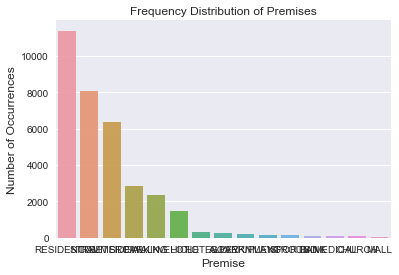

In [230]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
premise_count = crime_cut_df_cat['PremiseDescription'].value_counts()
sns.set(style="darkgrid")
sns.barplot(premise_count.index, premise_count.values, alpha=0.9)
plt.title('Frequency Distribution of Premises')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Premise', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

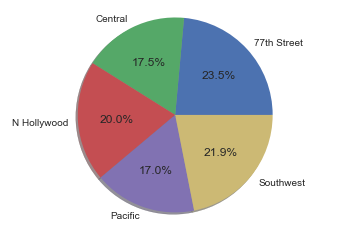

In [231]:
labels = crime_cut_df_cat['AreaName'].astype('category').cat.categories.tolist()
counts = crime_cut_df_cat['AreaName'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

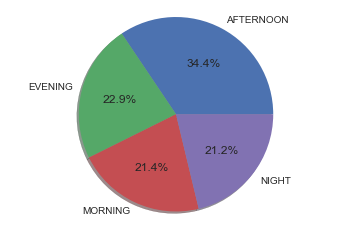

In [232]:
labels = crime_cut_df_cat['TimeOfDay'].astype('category').cat.categories.tolist()
counts = crime_cut_df_cat['TimeOfDay'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [268]:
#we want to try to predict the premise.  Set y equal to it.
y = crime_cut_df_cat['PremiseDescription']

#Now drop that column so that we're left with the features only.
X = crime_cut_df_cat.drop(columns=['PremiseDescription'])

In [269]:
#One-hot encode the strings that are features

X = pd.get_dummies(X)
X.head()

,Month_February,Month_January,Month_March,Year_2017,Year_2018,TimeOfDay_AFTERNOON,TimeOfDay_EVENING,TimeOfDay_MORNING,TimeOfDay_NIGHT,AreaName_77th Street,...,CrimeClassification_INFRACTION,CrimeClassification_MISDEMEANOR,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Dust,weather_main_Haze,weather_main_Rain,weather_main_Smoke,weather_main_Thunderstorm
15,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
28,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
29,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
30,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
31,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [270]:
from sklearn import preprocessing

#Encode the labels
le = preprocessing.LabelEncoder()
y_labels = le.fit_transform(y)
y_labels

array([13, 10, 10, ...,  3, 10, 10], dtype=int64)

In [271]:
print(X.shape)
print(y.shape)

(33875, 144)
(33875,)


In [272]:
test_df = pd.concat([crime_cut_df_num, X], axis=1)
print(test_df.shape)
test_df.head()


(33875, 150)


,Population,VictimAge,farenheit,pressure,humidity,wind_speed,Month_February,Month_January,Month_March,Year_2017,...,CrimeClassification_INFRACTION,CrimeClassification_MISDEMEANOR,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Dust,weather_main_Haze,weather_main_Rain,weather_main_Smoke,weather_main_Thunderstorm
15,406183,40,74.606,1016,60,2,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
28,406183,24,70.358,1017,72,3,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
29,406183,24,70.358,1017,72,3,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
30,406183,47,63.248,1018,87,2,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
31,406183,47,63.248,1018,87,2,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25406, 144)
(8469, 144)
(25406,)
(8469,)


In [274]:
#Let's try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.507379855945212

In [307]:
crime_df['VictimAge'] = crime_df['VictimAge'].apply(pd.to_numeric, errors='coerce')
crime_df['Population'] = crime_df['Population'].apply(pd.to_numeric, errors='coerce')
crime_df['farenheit'] = crime_df['farenheit'].apply(pd.to_numeric, errors='coerce')
crime_df['pressure'] = crime_df['pressure'].apply(pd.to_numeric, errors='coerce')
crime_df['humidity'] = crime_df['humidity'].apply(pd.to_numeric, errors='coerce')
crime_df['wind_speed'] = crime_df['wind_speed'].apply(pd.to_numeric, errors='coerce')

In [308]:
X = crime_df[["TimeOfDay", "AreaName", "CrimeClassification", "farenheit",  "Population", "humidity",
              "pressure"]]

y = crime_df["VictimAge"]



In [309]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25586, 7)
(8529, 7)
(25586,)
(8529,)


In [310]:
#Do a get_dummies on the X dataframe
X_hot = pd.get_dummies(X)
print(X_hot.shape)
X_hot.head()

(34115, 16)


,farenheit,Population,humidity,pressure,TimeOfDay_AFTERNOON,TimeOfDay_EVENING,TimeOfDay_MORNING,TimeOfDay_NIGHT,AreaName_77th Street,AreaName_Central,AreaName_N Hollywood,AreaName_Pacific,AreaName_Southwest,CrimeClassification_FELONY,CrimeClassification_INFRACTION,CrimeClassification_MISDEMEANOR
15,74.606,406183,60,1016,0,0,0,1,0,0,0,1,0,0,0,1
28,70.358,406183,72,1017,0,1,0,0,0,0,0,1,0,0,0,1
29,70.358,406183,72,1017,0,1,0,0,0,0,0,1,0,0,0,1
30,63.248,406183,87,1018,0,1,0,0,0,0,0,1,0,0,0,1
31,63.248,406183,87,1018,0,1,0,0,0,0,0,1,0,0,0,1


In [311]:
#from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
#label_encoder = LabelEncoder()
#label_encoder.fit(y)
#encoded_y = label_encoder.transform(y)
#encoded_y.shape

In [312]:
#from keras.utils import to_categorical

# Step 2: One-hot encoding
#one_hot_y = to_categorical(encoded_y)
#one_hot_y

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_hot, encoded_y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25586, 16)
(8529, 16)
(25586,)
(8529,)


In [314]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [315]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [316]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.09067458766512937
Testing Data Score: 0.09016297338492203


In [318]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.16484933755422676

In [319]:
#Let's try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.16719427834447181

In [320]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 20 decision trees
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4)

# Train the model on training data
rf.fit(X_train, y_train);
rf.score(X_test, y_test)

0.048286668978746894

In [321]:
# Random Forests in sklearn will automatically calculate feature importance

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
CrimeClassification_MISDEMEANOR,0.297131
CrimeClassification_FELONY,0.296418
AreaName_Central,0.083528
Population,0.065027
farenheit,0.061102
TimeOfDay_MORNING,0.057917
AreaName_Pacific,0.055009
AreaName_Southwest,0.020738
humidity,0.017928
TimeOfDay_NIGHT,0.017106
